In [49]:
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [50]:
torch.__version__

'2.0.1+cu118'

In [51]:
seed=20

In [52]:
torch.set_default_device('cuda')
# torch.manual_seed_all(seed)
torch.cuda.manual_seed_all(seed)


In [53]:
X,y= make_regression(100,n_features=1,noise=0.4,random_state=seed)
y=y.reshape(-1,1)

In [54]:
X= torch.tensor(X)
y= torch.tensor(y)

In [55]:
X.shape,y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

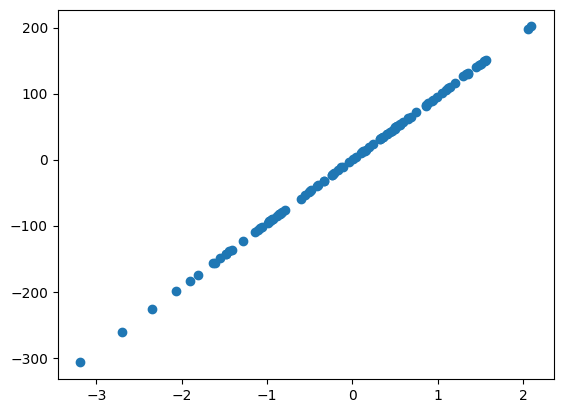

In [56]:
plt.scatter(X.numpy(force=True),y.numpy(force=True))

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

In [58]:
def visualize(y_preds,loss_list):
    plt.subplot(2,1,1)
    
    plt.plot(X_train.numpy(force=True),y_train.numpy(force=True),label='actual')
    plt.plot(X_test.numpy(force=True),y_preds.numpy(force=True),label='predicted')
    plt.legend()


    plt.subplot(2,1,2)
    plt.plot(loss_list, 'r')
    plt.tight_layout()
    plt.grid('True', color='y')
    plt.xlabel("Epochs/Iterations")
    plt.ylabel("Loss")
    plt.show()
        


In [59]:
weights=torch.randn(1,requires_grad=True,dtype=torch.float,)
bias = torch.randn(1,requires_grad=True,dtype=torch.float)

weights,bias

(tensor([-0.0784], device='cuda:0', requires_grad=True),
 tensor([1.2082], device='cuda:0', requires_grad=True))

tensor([97.3312], device='cuda:0', requires_grad=True) tensor([-4.3634], device='cuda:0', requires_grad=True)


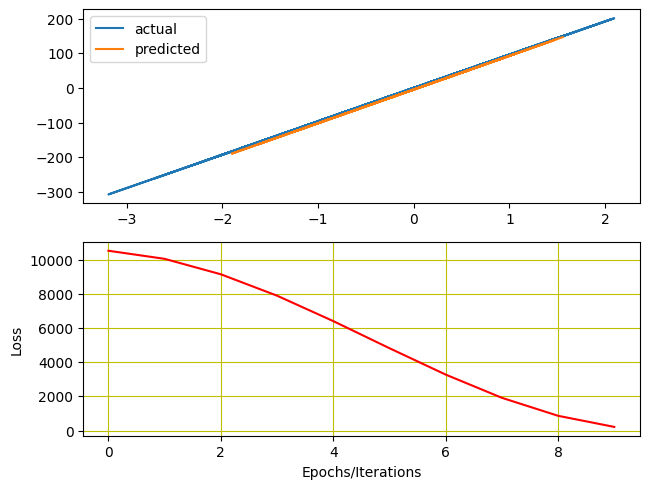

In [60]:
# evaluating data points with Mean Square Error.
def loss_fn(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

epochs =10
lr=0.01

loss_list=[]

for epoch in range(epochs):

    # forward pass
    y_preds= X_train*weights + bias

    # calculate loss
    loss = loss_fn(y_preds,y_train)


    loss_list.append(loss.item())
  
    # perform back propagation
    loss.backward()

    

    weights.data = weights.data - lr*weights.grad.data
    bias.data = bias.data - lr*bias.grad.data
    






print(weights,bias)
with torch.inference_mode():
    y_preds=X_test*weights+bias
visualize(y_preds,loss_list)
  

